In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import matplotlib.gridspec as gridspec
import itertools
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate



# DATASET
The dataset below has been explained in earlier notebooks and is being used here to carry on the data. 

In [2]:
contraceptive_data = pd.read_csv("contraceptive_method_dataset.csv", 
                                 encoding = "ISO-8859-1", engine='python')
X = contraceptive_data.drop('children', axis=1).copy()
contraceptive_data['predictor_population']= pd.cut(contraceptive_data['children'],
                                       [-1,2,16], labels=[0,1])
contraceptive_data['predictor_population_i']= contraceptive_data['predictor_population'].astype(int)
y= contraceptive_data['predictor_population_i']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, 
                                                    random_state = 24, stratify = y )

In [3]:
# Standard Scaler with Sklearn
std_scaler = StandardScaler()
#Training mean and std was calculated and was used in the transformation.
std_scaler.fit(X_train)
X_train_scaled = std_scaler.transform(X_train)
## Never fit onto Test data!! Only Transform
X_test_scaled  = std_scaler.transform(X_test)

# Logistic Regression Modeling
### Without Regularization (Vanilla Log Regression)

In [4]:
#Import Logistic Regression
from sklearn.linear_model import LogisticRegression

In [5]:
#Instantiate Logistic Regression with no penalty
lr = LogisticRegression(penalty = 'none')

In [6]:
#Fit Model and learned the coefficients
lr.fit(X_train_scaled, y_train) 

LogisticRegression(penalty='none')

In [7]:
#y_pred is the estimated targets as returned by a classifier.
y_pred = lr.predict(X_train_scaled)

In [8]:
#This is the accuracy of the trained data
score = lr.score(X_train_scaled, y_train)
print(score)

0.7769156159068865


In [9]:
#from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix

In [10]:
#Create confusion matrix to evaluate the accuracy of the classification
cm = confusion_matrix(y_train, y_pred)
cm

array([[324, 130],
       [100, 477]], dtype=int64)

In [11]:
#This is the accuracy of the test data
lr.score(X_test_scaled, y_test)

0.753393665158371

In [12]:
import utils

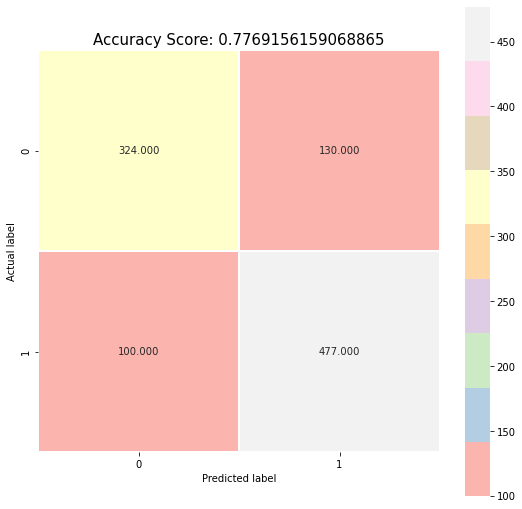

In [13]:
utils.plot_confusion_matrix(cm, score)

_Notes_
- For this Logistic Regression Model without Regularization. The Accuracy of the Test score is 0.7769 ~ 0.7769156159068865 while the Accuracy of the Train Score is  0.7534 ~ 0.753393665158371. Here is the Test Score is higher than the Train Score.
- The Accuracy Score of this plot confusion matrix is approximately 0.7769 ~ 0.77691561590.
- Of the no population increase (index 0) 454 which is 324 + 130, 324 (71.36%) is correctly classified. On the other hand the population increase (index 1) 577 which is 477 + 100, 477 (82.66897%) is correctly classified.

## Cross Validation
Using X train scaled and y train to do a cross validation for 5 split with no penalty, return train score and return estimator 

In [14]:
lr = LogisticRegression(penalty = 'none')

In [15]:
#Using only trained data with 5 cross validation with return train score
cv_fivefold = cross_validate(estimator= lr, 
                             X = X_train_scaled,
                             y = y_train,
                             cv = 5,
                             n_jobs= -1, 
                             return_train_score= True, 
                             return_estimator= True, verbose = 2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.6s finished


In [16]:
#Investigate the cv results. cv_fivefold is a directory because it has curly bracket
cv_fivefold['test_score']

array([0.7826087 , 0.7815534 , 0.80582524, 0.72330097, 0.76699029])

In [17]:

cv_fivefold['train_score']

array([0.77427184, 0.77090909, 0.76727273, 0.78787879, 0.78181818])

In [18]:
validation_mean = cv_fivefold['test_score'].mean()

validation_std = cv_fivefold['test_score'].std()

In [19]:
print('Vanilla Logistic Regression 5-fold cv results (Accuracy) %.3f +/- %.3f'%(validation_mean, validation_std))

Vanilla Logistic Regression 5-fold cv results (Accuracy) 0.772 +/- 0.027


_Notes_
- The Vanilla Log Regression (Accuracy) without regularization is .772 +/- 0.027 which is almost the same as the accuracy of the test data which is 0.753393665158371.

# Logistic with Regularization


In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
lr = LogisticRegression(penalty = 'l2', C = 1, solver = 'saga', max_iter= 1000)

## Logistic Regression with Scaling

In [22]:
lr.fit(X_train_scaled, y_train)

LogisticRegression(C=1, max_iter=1000, solver='saga')

In [23]:
y_pred = lr.predict(X_train_scaled)

In [24]:
confusion_matrix(y_train, y_pred)

array([[324, 130],
       [100, 477]], dtype=int64)

## Cross Validation
Using X train scaled and y train to do a cross validation for 5 split with return train score and return estimator

In [25]:
cv_fivefold = cross_validate(estimator= lr, 
                             X = X_train_scaled,
                             y = y_train,
                             cv = 5,
                             return_train_score= True, 
                             return_estimator= True, verbose = 2)

[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [26]:
validation_mean = cv_fivefold['test_score'].mean()

validation_std = cv_fivefold['test_score'].std()

print('Vanilla Regression 5-fold cv results (Accuracy) %.3f =/- %.3f'%(validation_mean, validation_std))

Vanilla Regression 5-fold cv results (Accuracy) 0.772 =/- 0.027


_Notes_
- The Logistic Regression Modeling without regularization has the same result in the vanilla regression 5-fold cv results. Its accuracy are both 77.2% +/- 0.027

## Grid Search Validation with Ridge

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
#Penalty of l2 is Ridge
lr = LogisticRegression(penalty = 'l2', C = 1, solver = 'saga', max_iter= 1000)
lr.fit(X_train_scaled, y_train)

# Prepare a grid with C and penalty. Next, Instantiate the grid search. Lastly, the fit the
# grid search
grid = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}
grid_search_cv = GridSearchCV(estimator = lr, param_grid= grid, 
                              cv =5, return_train_score= True, verbose= 2)
grid_search_cv.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=0.01, penalty=l1 ..............................................
[CV] ............................... C=0.01, penalty=l1, total=   0.0s
[CV] C=0.01, penalty=l1 ..............................................
[CV] ............................... C=0.01, penalty=l1, total=   0.0s
[CV] C=0.01, penalty=l1 ..............................................
[CV] ............................... C=0.01, penalty=l1, total=   0.0s
[CV] C=0.01, penalty=l1 ..............................................
[CV] ............................... C=0.01, penalty=l1, total=   0.0s
[CV] C=0.01, penalty=l1 ..............................................
[CV] ............................... C=0.01, penalty=l1, total=   0.0s
[CV] C=0.01, penalty=l2 ..............................................
[CV] ............................... C=0.01, penalty=l2, total=   0.0s
[CV] C=0.01, penalty=l2 ..............................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] C=1, penalty=l1 .................................................
[CV] .................................. C=1, penalty=l1, total=   0.0s
[CV] C=1, penalty=l1 .................................................
[CV] .................................. C=1, penalty=l1, total=   0.0s
[CV] C=1, penalty=l2 .................................................
[CV] .................................. C=1, penalty=l2, total=   0.0s
[CV] C=1, penalty=l2 .................................................
[CV] .................................. C=1, penalty=l2, total=   0.0s
[CV] C=1, penalty=l2 .................................................
[CV] .................................. C=1, penalty=l2, total=   0.0s
[CV] C=1, penalty=l2 .................................................
[CV] .................................. C=1, penalty=l2, total=   0.0s
[CV] C=1, penalty=l2 .................................................
[CV] .................................. C=1, penalty=l2, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.3s finished


GridSearchCV(cv=5,
             estimator=LogisticRegression(C=1, max_iter=1000, solver='saga'),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             return_train_score=True, verbose=2)

In [28]:
#Check the grid search cv results. Then make the dataframe
grid_search_cv.cv_results_

{'mean_fit_time': array([0.00313411, 0.0078649 , 0.00552802, 0.        , 0.00688934,
        0.00625091, 0.00515261, 0.00826225, 0.00719495, 0.00619445]),
 'std_fit_time': array([0.00626822, 0.00698872, 0.00686671, 0.        , 0.00786115,
        0.00765577, 0.00654446, 0.00745809, 0.00146891, 0.00116457]),
 'mean_score_time': array([0.00311704, 0.00019569, 0.        , 0.00624957, 0.00332484,
        0.        , 0.00019989, 0.0006    , 0.00039992, 0.00080161]),
 'std_score_time': array([0.00623407, 0.00039139, 0.        , 0.00765413, 0.00616145,
        0.        , 0.00039978, 0.0004899 , 0.0004898 , 0.00040082]),
 'param_C': masked_array(data=[0.01, 0.01, 0.1, 0.1, 1, 1, 10, 10, 100, 100],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_penalty': masked_array(data=['l1', 'l2', 'l1', 'l2', 'l1', 'l2', 'l1', 'l2', 'l1',
                    'l2'],
              mask=

In [29]:
pd.DataFrame(grid_search_cv.cv_results_ ).sort_values('mean_test_score', ascending = False).T

,3,4,1,6,8,5,7,9,2,0
mean_fit_time,0,0.00688934,0.0078649,0.00515261,0.00719495,0.00625091,0.00826225,0.00619445,0.00552802,0.00313411
std_fit_time,0,0.00786115,0.00698872,0.00654446,0.00146891,0.00765577,0.00745809,0.00116457,0.00686671,0.00626822
mean_score_time,0.00624957,0.00332484,0.000195694,0.00019989,0.000399923,0,0.000600004,0.000801611,0,0.00311704
std_score_time,0.00765413,0.00616145,0.000391388,0.00039978,0.000489804,0,0.000489901,0.000400822,0,0.00623407
param_C,0.1,1,0.01,10,100,1,10,100,0.1,0.01
param_penalty,l2,l1,l2,l1,l1,l2,l2,l2,l1,l1
params,"{'C': 0.1, 'penalty': 'l2'}","{'C': 1, 'penalty': 'l1'}","{'C': 0.01, 'penalty': 'l2'}","{'C': 10, 'penalty': 'l1'}","{'C': 100, 'penalty': 'l1'}","{'C': 1, 'penalty': 'l2'}","{'C': 10, 'penalty': 'l2'}","{'C': 100, 'penalty': 'l2'}","{'C': 0.1, 'penalty': 'l1'}","{'C': 0.01, 'penalty': 'l1'}"
split0_test_score,0.782609,0.782609,0.782609,0.782609,0.782609,0.782609,0.782609,0.782609,0.772947,0.743961
split1_test_score,0.781553,0.786408,0.791262,0.786408,0.786408,0.781553,0.781553,0.781553,0.776699,0.737864
split2_test_score,0.81068,0.805825,0.800971,0.805825,0.805825,0.805825,0.805825,0.805825,0.805825,0.762136


In [30]:
### Cross Validation in 5 Split

In [31]:
from sklearn.model_selection import cross_validate
# Print the best parameters and cross validate the best estimator, penalty is ridge l2
lr = LogisticRegression(C = 0.1, penalty = 'l2', solver = 'saga', max_iter= 10000)
cv_fivefold = cross_validate(estimator= lr, 
                             X = X_train_scaled,
                             y = y_train,
                             cv = 5,
                             return_train_score= True, 
                             return_estimator= True, verbose = 2)

[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [32]:
cv_fivefold['test_score']

array([0.7826087 , 0.7815534 , 0.81067961, 0.73300971, 0.76699029])

In [33]:
## fit best regularization logreg and plot the confusion matrix
validation_mean = cv_fivefold['test_score'].mean()

validation_std = cv_fivefold['test_score'].std()

print('Regularized Log Regression (Ridge) 5-fold cv results (Accuracy) %.3f +/- %.3f'%(validation_mean, validation_std))

Regularized Log Regression (Ridge) 5-fold cv results (Accuracy) 0.775 +/- 0.025


_Note_
- Regularized Log Regression (Ridge) 5 fold cv results (Accuracy) 0.775 +/- 0.025

## Grid Search Validation with Lasso

In [34]:
#Grid Search
lr = LogisticRegression(penalty = 'l1', C = 1, solver = 'saga', max_iter= 1000)
lr.fit(X_train_scaled, y_train)

# Prepare a grid with C and penalty. Next, Instantiate the grid search. Lastly, the fit the
# grid search
grid = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}
grid_search_cv = GridSearchCV(estimator = lr, param_grid= grid, 
                              cv =5, return_train_score= True, verbose= 2)
grid_search_cv.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=0.01, penalty=l1 ..............................................
[CV] ............................... C=0.01, penalty=l1, total=   0.0s
[CV] C=0.01, penalty=l1 ..............................................
[CV] ............................... C=0.01, penalty=l1, total=   0.0s
[CV] C=0.01, penalty=l1 ..............................................
[CV] ............................... C=0.01, penalty=l1, total=   0.0s
[CV] C=0.01, penalty=l1 ..............................................
[CV] ............................... C=0.01, penalty=l1, total=   0.0s
[CV] C=0.01, penalty=l1 ..............................................
[CV] ............................... C=0.01, penalty=l1, total=   0.0s
[CV] C=0.01, penalty=l2 ..............................................
[CV] ............................... C=0.01, penalty=l2, total=   0.0s
[CV] C=0.01, penalty=l2 ..............................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] C=1, penalty=l2 .................................................
[CV] .................................. C=1, penalty=l2, total=   0.0s
[CV] C=1, penalty=l2 .................................................
[CV] .................................. C=1, penalty=l2, total=   0.0s
[CV] C=1, penalty=l2 .................................................
[CV] .................................. C=1, penalty=l2, total=   0.0s
[CV] C=1, penalty=l2 .................................................
[CV] .................................. C=1, penalty=l2, total=   0.0s
[CV] C=1, penalty=l2 .................................................
[CV] .................................. C=1, penalty=l2, total=   0.0s
[CV] C=10, penalty=l1 ................................................
[CV] ................................. C=10, penalty=l1, total=   0.0s
[CV] C=10, penalty=l1 ................................................
[CV] ................................. C=10, penalty=l1, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.3s finished


GridSearchCV(cv=5,
             estimator=LogisticRegression(C=1, max_iter=1000, penalty='l1',
                                          solver='saga'),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             return_train_score=True, verbose=2)

In [35]:
lr = LogisticRegression(C = 0.1, penalty = 'l1', solver = 'saga', max_iter= 10000)
cv_fivefold = cross_validate(estimator= lr, 
                             X = X_train_scaled,
                             y = y_train,
                             cv = 5,
                             return_train_score= True, 
                             return_estimator= True, verbose = 2)

[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [36]:
## fit best regularization logreg and plot the confusion matrix
validation_mean = cv_fivefold['test_score'].mean()

validation_std = cv_fivefold['test_score'].std()
print('Regularized Log Regression (Lasso) 5-fold cv results (Accuracy) %.3f +/- %.3f'%(validation_mean, validation_std))

Regularized Log Regression (Lasso) 5-fold cv results (Accuracy) 0.770 +/- 0.024
